In [1]:
import pandas as pd
import numpy as np

import logging

from prophet import Prophet
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_absolute_error

logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('prophet').setLevel(logging.CRITICAL)
logging.getLogger('cmdstanby').setLevel(logging.ERROR)
logging.getLogger('cmdstanby').propagate = False
logging.getLogger('cmdstanby').setLevel(logging.CRITICAL)

c:\Users\ramiz\Desktop\Programming\QSS\HW\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('GOOGLE.csv')

df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343


In [3]:
len(df)

4431

In [4]:
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055
...,...,...
4426,2022-03-18,2722.510010
4427,2022-03-21,2722.030029
4428,2022-03-22,2797.360107
4429,2022-03-23,2765.510010


In [5]:
# df = df[df['ds'] >= '2015-01-01']
# df

In [6]:
train_size = int(len(df) * 0.95)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [7]:
test_df

,ds,y
4209,2021-05-10,2291.750000
4210,2021-05-11,2270.060059
4211,2021-05-12,2200.250000
4212,2021-05-13,2229.040039
4213,2021-05-14,2278.379883
...,...,...
4426,2022-03-18,2722.510010
4427,2022-03-21,2722.030029
4428,2022-03-22,2797.360107
4429,2022-03-23,2765.510010


In [8]:
def prophet_cv(changepoint_prior_scale, seasonality_prior_scale, holidays_prior_scale):
    
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale
    )
    
    model.fit(train_df)
    future = model.make_future_dataframe(periods=len(test_df))
    forecast = model.predict(future)
    
    y_pred = forecast['yhat'].iloc[-len(test_df):].values
    y_true = test_df['y'].values    
    mae = mean_absolute_error(y_true, y_pred)
    
    return -mae

pbounds = {
    'changepoint_prior_scale': (0.001, 0.5),
    'seasonality_prior_scale': (0.01, 10),
    'holidays_prior_scale': (0.01, 10)
}


optimizer = BayesianOptimization(
    f=prophet_cv,
    pbounds=pbounds,
    random_state=42,
)

optimizer.maximize(
    init_points=5,
    n_iter=20,
)

best_params = optimizer.max['params']
print("Best parameters found : ", best_params)

|   iter    |  target   | change... | holida... | season... |
-------------------------------------------------------------


10:57:12 - cmdstanpy - INFO - Chain [1] start processing
10:57:13 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -859.3    | 0.1879    | 9.508     | 7.323     |


10:57:14 - cmdstanpy - INFO - Chain [1] start processing
10:57:16 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -858.4    | 0.2997    | 1.569     | 1.568     |


10:57:17 - cmdstanpy - INFO - Chain [1] start processing
10:57:18 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -880.5    | 0.02998   | 8.663     | 6.015     |


10:57:18 - cmdstanpy - INFO - Chain [1] start processing
10:57:20 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -857.8    | 0.3543    | 0.2156    | 9.699     |


10:57:21 - cmdstanpy - INFO - Chain [1] start processing
10:57:22 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -858.2    | 0.4164    | 2.131     | 1.826     |


10:57:23 - cmdstanpy - INFO - Chain [1] start processing
10:57:25 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -857.8    | 0.3393    | 10.0      | 8.576     |


10:57:26 - cmdstanpy - INFO - Chain [1] start processing
10:57:27 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -858.2    | 0.4367    | 0.256     | 7.963     |


10:57:28 - cmdstanpy - INFO - Chain [1] start processing
10:57:29 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -872.4    | 0.04949   | 1.836     | 8.924     |


10:57:30 - cmdstanpy - INFO - Chain [1] start processing
10:57:31 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -857.6    | 0.5       | 8.775     | 8.548     |


10:57:32 - cmdstanpy - INFO - Chain [1] start processing
10:57:33 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -999.3    | 0.001     | 9.165     | 9.982     |


10:57:34 - cmdstanpy - INFO - Chain [1] start processing
10:57:35 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -857.6    | 0.5       | 8.066     | 7.613     |


10:57:36 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -857.6    | 0.4943    | 1.194     | 3.116     |


10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -994.6    | 0.001     | 2.684     | 3.456     |


10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:42 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -858.0    | 0.4936    | 0.2785    | 2.321     |


10:57:43 - cmdstanpy - INFO - Chain [1] start processing
10:57:44 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -857.6    | 0.5       | 0.01      | 3.728     |


10:57:45 - cmdstanpy - INFO - Chain [1] start processing
10:57:46 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -856.4    | 0.4155    | 2.614     | 0.3898    |


10:57:47 - cmdstanpy - INFO - Chain [1] start processing
10:57:49 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -855.5    | 0.5       | 1.04      | 0.01      |


10:57:50 - cmdstanpy - INFO - Chain [1] start processing
10:57:51 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -857.8    | 0.5       | 0.01      | 6.194     |


10:57:52 - cmdstanpy - INFO - Chain [1] start processing
10:57:54 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -858.3    | 0.489     | 1.559     | 6.863     |


10:57:55 - cmdstanpy - INFO - Chain [1] start processing
10:57:56 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -855.5    | 0.5       | 4.273     | 0.01      |


10:57:57 - cmdstanpy - INFO - Chain [1] start processing
10:57:58 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -968.8    | 0.001     | 5.781     | 0.01      |


10:57:59 - cmdstanpy - INFO - Chain [1] start processing
10:58:00 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -857.6    | 0.5       | 3.68      | 1.136     |


10:58:01 - cmdstanpy - INFO - Chain [1] start processing
10:58:02 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -996.3    | 0.001     | 0.01      | 0.7593    |


10:58:03 - cmdstanpy - INFO - Chain [1] start processing
10:58:03 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -1.001e+0 | 0.001     | 0.5751    | 6.992     |


10:58:04 - cmdstanpy - INFO - Chain [1] start processing
10:58:06 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -859.2    | 0.1652    | 9.631     | 5.057     |
Best parameters found :  {'changepoint_prior_scale': np.float64(0.5), 'holidays_prior_scale': np.float64(1.0396418535260181), 'seasonality_prior_scale': np.float64(0.01)}


10:58:07 - cmdstanpy - INFO - Chain [1] start processing
10:58:09 - cmdstanpy - INFO - Chain [1] done processing


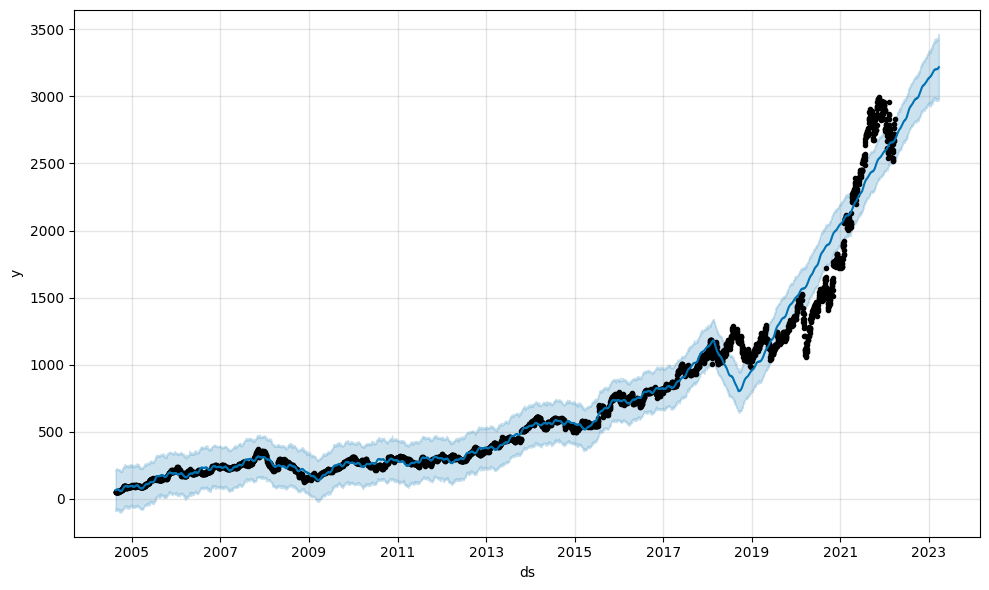

In [9]:
final_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale']
)

final_model.fit(df) # Fit on the entire dataset
future = final_model.make_future_dataframe(periods=365) # Forecast for 1 year (365 days)
forecast = final_model.predict(future)

fig_prophet = final_model.plot(forecast) # Prophet's built-in plot

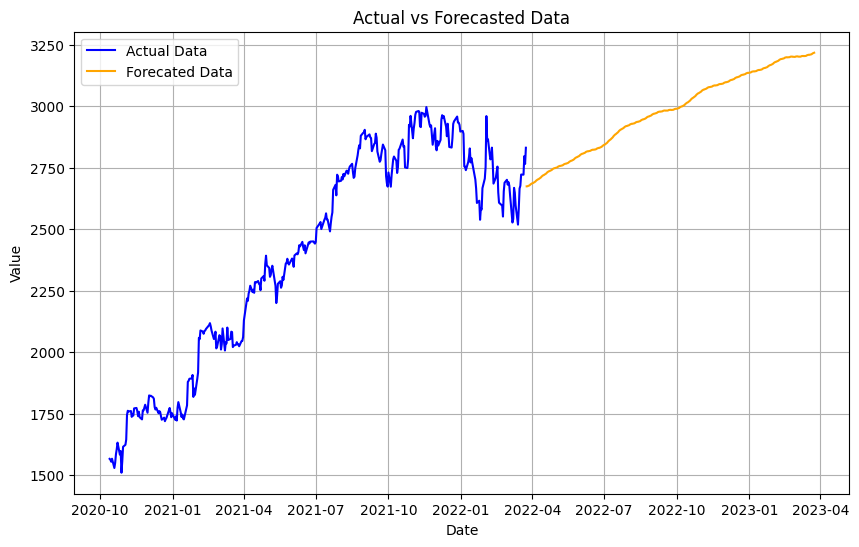

In [10]:
import matplotlib.pyplot as plt

forecasted_data = forecast[forecast['ds'] >df['ds'].max()][['ds', 'yhat']]

last_365_actual = df[-365:]

plt.figure(figsize=(10, 6))
plt.plot(last_365_actual['ds'], last_365_actual['y'], label='Actual Data', color='blue')
plt.plot(forecasted_data['ds'], forecasted_data['yhat'], label='Forecated Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Data')
plt.legend()
plt.grid(True)
plt.show()